In [1]:
import sample_measure_lib

In [2]:
import lxml
import trimesh
import os
import sys


import numpy as np
from math import sin, cos, atan, pi, sqrt, pow

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.lines as mlines
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import matplotlib.gridspec as gridspec

from sample_measure_lib.calcs import *
from sample_measure_lib.draws import *
from sample_measure_lib.draws_io import ImageHandler, ImageHandlerNull
from sample_measure_lib.formats import *
from sample_measure_lib.experiments import *


In [23]:
from importlib import reload
import sample_measure_lib
_ = reload(sample_measure_lib)

In [4]:
import sample_measure_lib.draws_io

In [3]:
img_handler = ImageHandlerNull()

In [5]:
def validate_samples_or_fail(xy_samples, points, img_handler):
    if len(xy_samples) < 4 or len(xy_samples) > 32:
        print("Unable to split on samples after rotation. Check the picture to adjust samples layout")
        img_handler.draw_points4_and_save(points, '3d-split-failure')        
        raise


In [6]:
path = "data/File.3mf"
os.path.exists(path)

True

In [7]:
points = load_points(path)
x_arr, y_arr, z_arr = xyz_cols(points)

img_handler.draw_points4_and_save(points, '3d-origin')

# reverse upside down
z_arr = [-z for z in z_arr]
move_zero(x_arr, y_arr, z_arr)
points = [(x_arr[i], y_arr[i], z_arr[i]) for i in range(len(x_arr))]


# rotate vertically for x and y to make flat
r = polyfit_line2rad(ycol(points), zcol(points))
rotate_xy_rad(y_arr, z_arr, -r)

points = col2points(x_arr, y_arr, z_arr)
r = polyfit_line2rad(xcol(points), zcol(points))
rotate_xy_rad(x_arr, z_arr, -r)
points = col2points(x_arr, y_arr, z_arr)

# rotate horizontally to parallel with x and y axis
xy_r = calc_xy_rad_by_corner(points)
rotate_xy_rad(x_arr, y_arr, xy_r)
all_points = col2points(x_arr, y_arr, z_arr)


# split samples
xy_samples, x_rows, y_rows = split_samples(all_points)
validate_samples_or_fail(xy_samples, all_points, img_handler)

# fine tune vertically to make flat

# rotate Y/Z
xy_lows = calc_lows(xy_samples)
x_angles = cacl_x_angles_by_rows(xy_lows, x_rows, y_rows)
#x_angles = calc_x_angles_by_corners(xy_samples, x_rows, y_rows)

r = sum(x_angles)/len(x_angles)
rotate_points_xy_rad(all_points, X_AXIS, Z_AXIS, -r)

# rotate X/Z
xy_samples, _, _ = split_samples(all_points)
y_angles = calc_y_angles_by_rows(xy_lows, x_rows, y_rows)
#y_angles = calc_y_angles_by_corners(xy_samples, x_rows, y_rows)

r = sum(y_angles)/len(y_angles)
rotate_points_xy_rad(all_points, Y_AXIS, Z_AXIS, -r)

# move up-down to baseline along Z
adjust_zero_base(all_points)
x_arr, y_arr, z_arr = xyz_cols(all_points)

xy_samples, _, _ = split_samples(all_points)
validate_samples_or_fail(xy_samples, all_points, img_handler)


# print_thinkness_csv(xy_samples, path)

x_arr, y_arr, z_arr = xcol(all_points), ycol(all_points), zcol(all_points)
img_handler.draw_points4_and_save(all_points, '3d-rotated')


points = xy_samples[-4] + xy_samples[-3] + xy_samples[-2] + xy_samples[-1]
x_arr, y_arr, z_arr = xyz_cols(points)

Reading 3mf file data/File.3mf
Loaded 204303 3d points
Rotate: -54.90 degree
Rotate: 2.12 degree
Rotate XY: 22.918215764975216
Rotate: 22.92 degree
Found 16 samples
X row [0] angle: -0.21
X row [1] angle: -0.35
X row [2] angle: -0.25
X row [3] angle: -0.34
Rotate XX: 0.28986570471280865 degree
Found 16 samples
calc_y_angles_by_rows
Y row [0] angle: 0.22
Y row [1] angle: 0.22
Y row [2] angle: 0.27
Y row [3] angle: 0.13
Rotate YX: -0.2095008632759201 degree
Adjust base-level by min Z-value: -0.195 ['-0.341', '-0.324', '-0.324', '-0.306', '-0.306', '-0.306', '-0.306', '-0.306', '-0.306', '-0.306']
Found 16 samples


In [8]:
from importlib import reload
import sample_measure_lib.draws
_ = reload(sample_measure_lib.draws)
from sample_measure_lib.draws import draw_samples

In [8]:
np.linspace(0, 10, 101)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [360]:
#points = np.array(xy_samples).ravel()
#points = [p for p in points if p[0] < -25 and p[1] > -30]
x_arr, y_arr, z_arr = xyz_cols(points)

global_points = []
for p in xy_samples:
    global_points.extend(p)


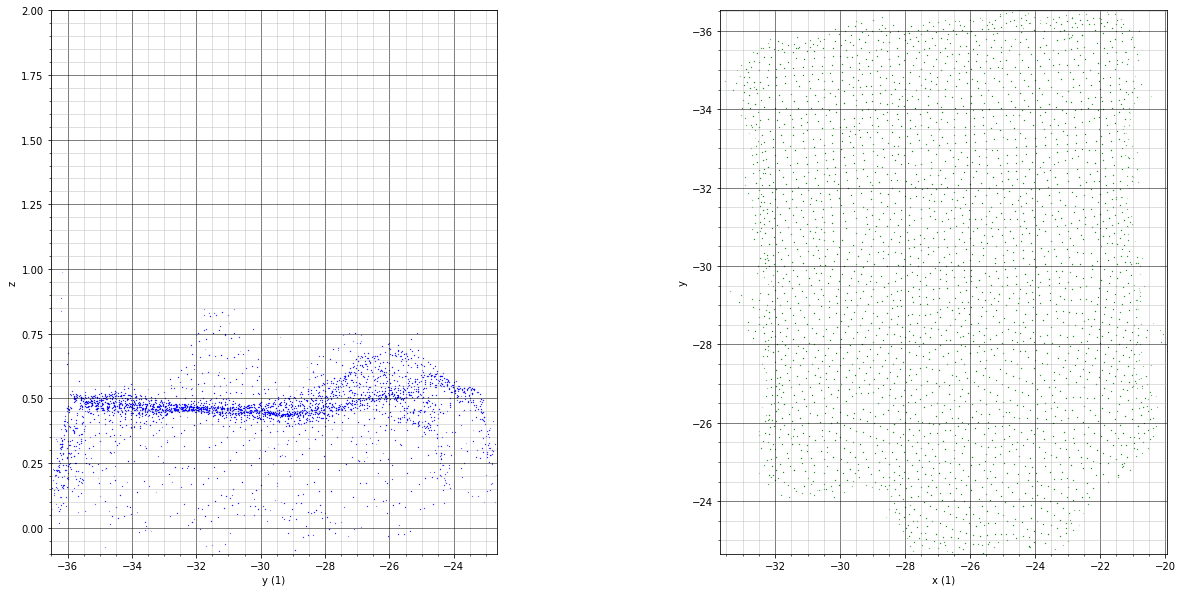

In [36]:
draw_samples(plt, [points], xy_lows, 1, 1)

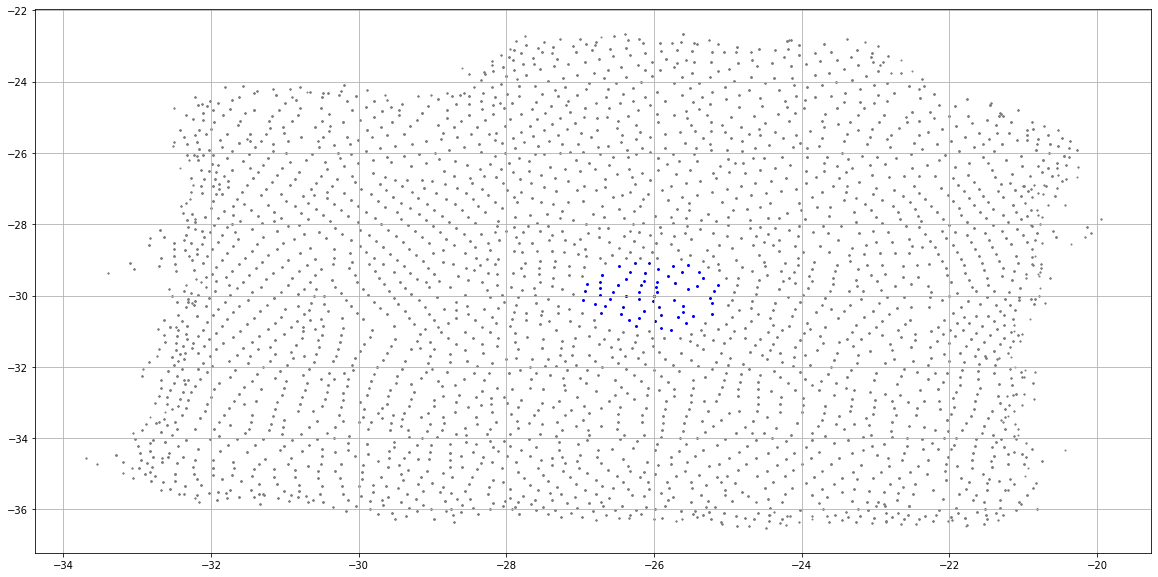

In [185]:
x, y, z = x_arr, y_arr, z_arr

from scipy import spatial
tree = spatial.KDTree(list(zip(x, y)))
tree.data

p = (-26, -30)
indexes = tree.query_ball_point(p, 1)
xy = tree.data[indexes]

ix = xcol(xy)
iy = ycol(xy)


fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot(111)
ax1.grid()

ax1.scatter(x, y, s=1, c='gray')
ax1.scatter(ix, iy, s=1, c='blue')
ax1.scatter([p[0]], [p[1]], s=5, c='red')
#tree.data[9665]

In [379]:
[1,2,3] + [3,5]

[1, 2, 3, 3, 5]

In [418]:
x_arr, y_arr, z_arr = xyz_cols(global_points)
x, y, z = x_arr, y_arr, z_arr
base_z = min(z_arr)

x_lim = min(x_arr), max(x_arr)
y_lim = min(y_arr), max(y_arr)
precision = 0.5
x_num = int(abs(x_lim[1]-x_lim[0])/precision)
y_num = int(abs(y_lim[1]-y_lim[0])/precision)

x_grid = np.linspace(x_lim[0], x_lim[1], x_num)
y_grid = np.linspace(y_lim[0], y_lim[1], y_num)


B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')
Z = np.zeros(len(B1.ravel()))

xr = B1.ravel()
yr = B2.ravel()
zr = Z.ravel()

print("Fill spaces {}x{}".format(x_num, y_num))
    
from scipy import spatial
tree = spatial.KDTree(list(zip(x_arr, y_arr)))
space_points = []
for gp in list(zip(xr, yr)):
    i = tree.query(gp, distance_upper_bound=precision)
    if np.isinf(i[0]):
        space_points.append((gp[0], gp[1], base_z))


bx, by, bz = xyz_cols(global_points + space_points)
print("base points: {} ({} + {})".format(len(bx), len(global_points), len(space_points)))


Fill spaces 138x143
base points: 215562 (204303 + 11259)


In [421]:
x_arr, y_arr, z_arr = xyz_cols(global_points)
x, y, z = x_arr, y_arr, z_arr

x_lim = min(x_arr), max(x_arr)
y_lim = min(y_arr), max(y_arr)
precision = 0.1
x_num = int(abs(x_lim[1]-x_lim[0])/precision)
y_num = int(abs(y_lim[1]-y_lim[0])/precision)

x_grid = np.linspace(x_lim[0], x_lim[1], x_num)
y_grid = np.linspace(y_lim[0], y_lim[1], y_num)


B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')
Z = np.zeros(len(B1.ravel()))

xr = B1.ravel()
yr = B2.ravel()
zr = Z.ravel()


In [425]:
import scipy as sp
import scipy.interpolate

print("Calc interpolation {}x{}".format(x_num, y_num))
base_xy = list(zip(bx, by))
interp = sp.interpolate.LinearNDInterpolator(base_xy, bz, fill_value=0)
#interp = sp.interpolate.NearestNDInterpolator(base_xy, bz)
# interp = sp.interpolate.Rbf(bx,by,bz,smooth=1, episilon=1)
Z = interp(B1,B2)
#print(Z)
print("Done")

grid_points = np.vstack([xr, yr, Z.ravel()]).T
#print("{}".format(points.shape))
points = grid_points[grid_points[:,2]>0]
print("{}".format(points.shape))
#print("{}".format(points[:4,:]))

xr, yr, zr = points[:,0], points[:,1], points[:,2]

Calc interpolation 692x717
Done
(208809, 3)


496164 => low -0.14581015680848888 high 1.296238547415463
img4(496164): low 0.1 high 1.0
img5: (array([138295,      0,      0,      0, 357869]), array([0.1 , 0.28, 0.46, 0.64, 0.82, 1.  ]))
h: (array([489475,      0,      0,      0,   6689]), array([0.1 , 0.28, 0.46, 0.64, 0.82, 1.  ]))


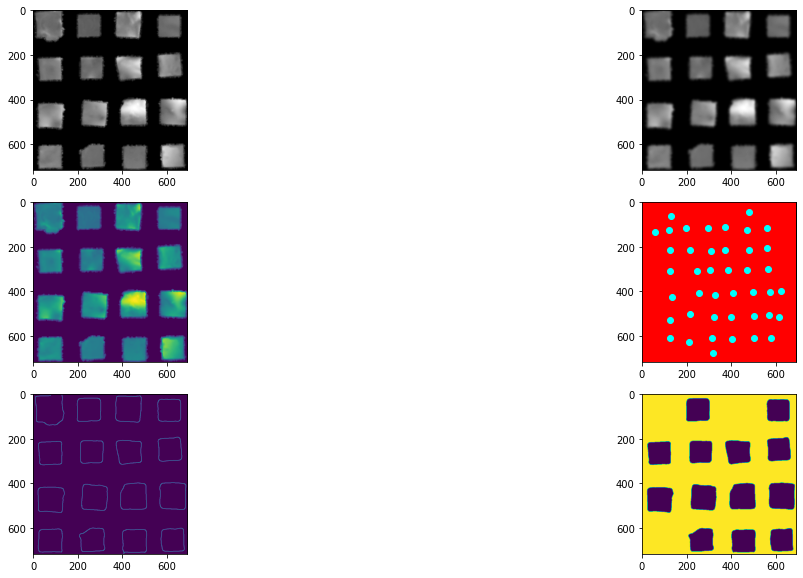

In [570]:
from scipy.ndimage import gaussian_filter
from skimage import filters
from skimage import feature
from skimage import measure
from skimage import segmentation
from skimage.morphology import square
img = grid_points[:,2].reshape(len(y_grid), len(x_grid))
#img[img<0.4] = 0

#img = np.vectorize(lambda z: z*10)(img)
print("{} => low {} high {}".format(len(grid_points), np.min(img), np.max(img)))
# print(img[20:,20:])

img2 = gaussian_filter(img, sigma=4)
img3 = filters.sobel(img2)
img4 = feature.canny(img2, sigma=5)
img4 = np.where(img4, 1.0, 0.1)
# print("img4: {}".format(img4[:20,:10]))
print("img4({}): low {} high {}".format(len(img4.ravel()), np.min(img4), np.max(img4)))
img5 = segmentation.flood_fill(img4, (1, 1), 1, connectivity=1)

h5 = np.histogram(img5, bins=5)
print("img5: {}".format(h5))

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

ax1.imshow(img, cmap=plt.cm.gray)
ax2.imshow(img2, cmap=plt.cm.gray)
ax3.imshow(img)
ax4.imshow(img4, cmap=plt.cm.gray)
ax5.imshow(img4)
ax6.imshow(img5)


z_edges = img4.ravel()

h = np.histogram(z_edges, bins=5)
print("h: {}".format(h))

zm = np.mean(z_edges)
# print("sz: {}".format(len(z_edges)))
zi = z_edges>zm
zi = grid_points[zi]

img4_edge_points = zi
#print("z_edges: {} ({})".format(zi, len(zi)))

from skimage.transform import probabilistic_hough_line

lines = probabilistic_hough_line(img4, threshold=5, line_length=60, line_gap=20)
for line in lines:
    p0, p1 = line
    ax4.plot((p0[0], p1[0]), (p0[1], p1[1]), c='r')
    
# contours = measure.find_contours(img4, 0.8)
# print("contours: {}".format(len(contours)))
# for n, contour in enumerate(contours):
#     ax4.plot(contour[:, 1], contour[:, 0], linewidth=2)
    
    
from skimage.feature import corner_harris, corner_subpix, corner_peaks
coords = corner_peaks(corner_harris(img4), min_distance=40, threshold_rel=0.02)
#coords_subpix = corner_subpix(im, coords, window_size=13)
ax4.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)

l 496164
l 496164


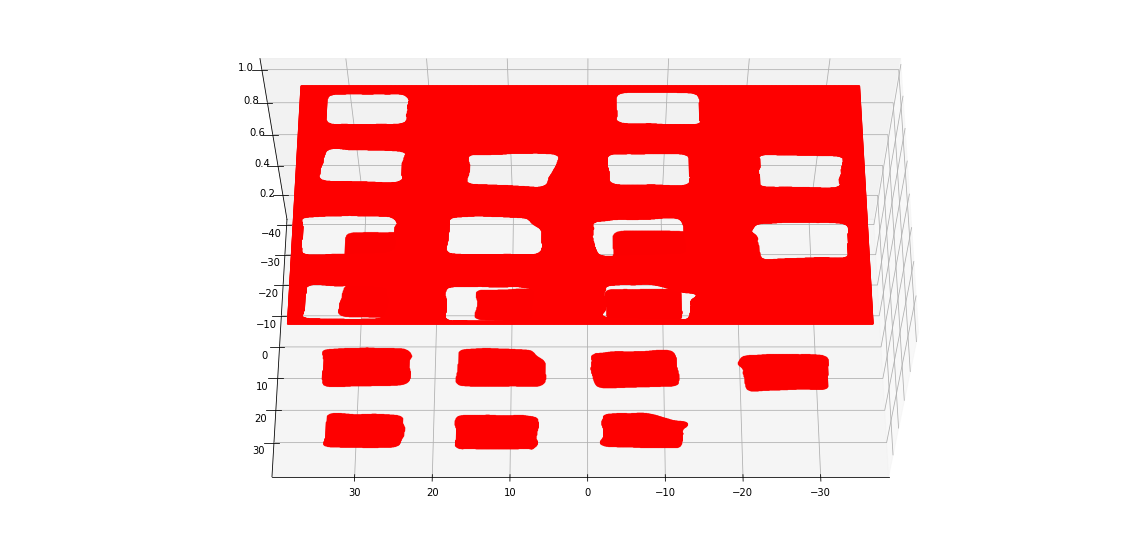

In [568]:
z_img5 = img5.ravel()

pts = []
print("l {}".format(len(grid_points)))
print("l {}".format(len(z_img5)))
for i in range(len(z_img5)):
    pts.append((grid_points[i][0], grid_points[i][1], z_img5[i]))

pts = np.array(pts)
xr, yr, zr = pts[:,0], pts[:,1], pts[:,2]
fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot(111, projection='3d')
#ax1.grid()
ax1.view_init(elev=60, azim=90)
ax1.scatter(xr, yr, zr, s=1, c='red')

In [104]:
B1, B2 = np.meshgrid(x_arr, y_arr)
print(len(x_arr))
print(len(B1))
print(len(B1[0]))

16920
16920
16920


m: 0.4434212350152043
p 50: 0.46
h: (array([ 482,  523,  555,  672, 1200, 8570, 2962,  905,  186,   48]), array([5.81955985e-04, 8.41423717e-02, 1.67702787e-01, 2.51263203e-01,
       3.34823619e-01, 4.18384034e-01, 5.01944450e-01, 5.85504866e-01,
       6.69065281e-01, 7.52625697e-01, 8.36186113e-01]))
h1: 10
h2: 11
height count: 16103
h1: [13184  1654   814   277    99    41    15     9     5     5]
h2: [0.05501801 0.10980688 0.16459574 0.2193846  0.27417346 0.32896233
 0.38375119 0.43854005 0.49332892 0.54811778]


<BarContainer object of 10 artists>

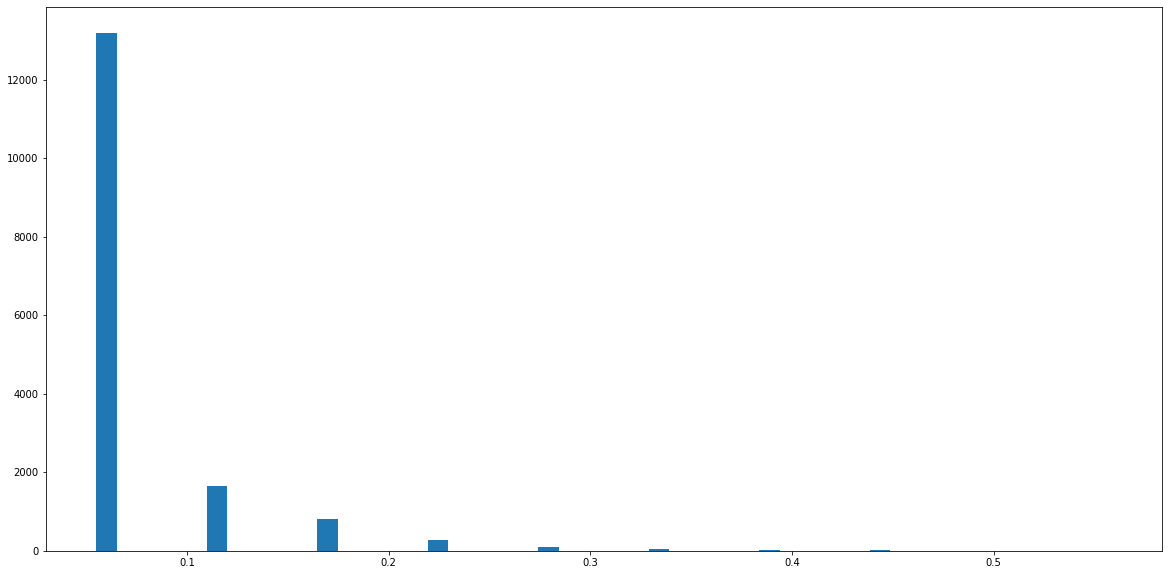

In [286]:
from scipy import spatial
import time

pts = points
xr, yr, zr = pts[:,0], pts[:,1], pts[:,2]


tree = spatial.KDTree(list(zip(xr, yr)))

m = np.mean(pts[:,2])
print("m: {}".format(m))
q = 50
print("p {}: {:.2f}".format(q, np.percentile(pts[:,2], q)))

h = np.histogram(pts[:,2], bins=10)
print("h: {}".format(h))
print("h1: {}".format(len(h[0])))
print("h2: {}".format(len(h[1])))

#fig = plt.figure(figsize=(20, 10))
#ax1 = plt.subplot(111)
#ax1 = fig.add_axes([0,0,1,1])
#ax1.barh(h[1][1:],h[0])

#for q in range(100):
#    print("p {}: {:.2f}".format(q, np.percentile(pts[:,2], q)))

edges = []
inner = []
heights = []

#pts[tree.query_ball_point(p[:2], precision + 0.01)]

for p in pts:
    near = pts[tree.query_ball_point(p[:2], precision + 0.01)]
    #near = near[0]
    #print(near)
    lo = np.min(near[:,2])
    hi = np.max(near[:,2])
    #print("lo: {:.2f} hi: {:.2f} h: {:0.2f}".format(lo, hi, hi-lo))
    if hi - lo > 0.1:
        edges.append(p)
    else:
        inner.append(p)
    heights.append(hi-lo)

    
print("height count: {}".format(len(heights)))
#heights = np.array(heights)
#print("{}".format(heights[heights<0]))
#print('heights {}'.format(heights))
    
h3 = np.histogram(heights)
print("h1: {}".format(h3[0]))
print("h2: {}".format(h3[1][1:]))
fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot(111)
ax1.bar(h3[1][1:], h3[0], width=0.01, align='edge')

#ax1.bar(range(3), [1,2,3], width=)

    
#m3 = np.meshgrid(xr, yr)
#print("m3: {}".format(len(m3[0])))
#for j in range(xr):
#    indexes = tree.query_ball_point(p, 0.5)

In [283]:
edges

[array([-26.82175182, -36.42469537,   0.21734736]),
 array([-26.72074024, -36.42469537,   0.20779638]),
 array([-26.61972866, -36.42469537,   0.1982454 ]),
 array([-26.51871708, -36.42469537,   0.18869442]),
 array([-26.01365919, -36.42469537,   0.15282648]),
 array([-25.91264761, -36.42469537,   0.15063429]),
 array([-25.81163603, -36.42469537,   0.1484421 ]),
 array([-25.71062445, -36.42469537,   0.14624992]),
 array([-25.60961287, -36.42469537,   0.14405773]),
 array([-25.50860129, -36.42469537,   0.14186554]),
 array([-24.09443919, -36.42469537,   0.23224527]),
 array([-23.99342761, -36.42469537,   0.21332323]),
 array([-22.78128866, -36.42469537,   0.15910912]),
 array([-21.87218445, -36.42469537,   0.1041451 ]),
 array([-21.77117287, -36.42469537,   0.19097367]),
 array([-26.82175182, -36.32347241,   0.10462075]),
 array([-26.72074024, -36.32347241,   0.10242857]),
 array([-26.61972866, -36.32347241,   0.10023638]),
 array([-26.31669392, -36.32347241,   0.13260488]),
 array([-26.

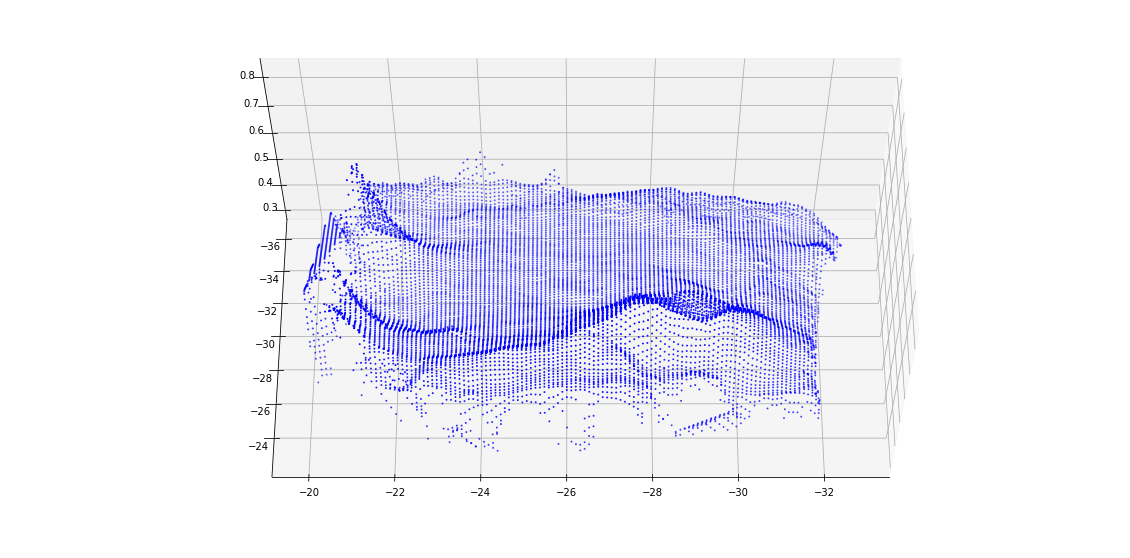

In [298]:
pts = np.array(edges)
xr, yr, zr = pts[:,0], pts[:,1], pts[:,2]

fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot(111, projection='3d')
#ax1.grid()
ax1.view_init(elev=60, azim=90)
#ax1.scatter(xr, yr, zr, s=1, c='red')

inner = np.array(inner)
inner = inner[inner[:,2]>0.3]
pts = np.array(inner)
xr, yr, zr = pts[:,0], pts[:,1], pts[:,2]
ax1.scatter(xr, yr, zr, s=1, c='blue')


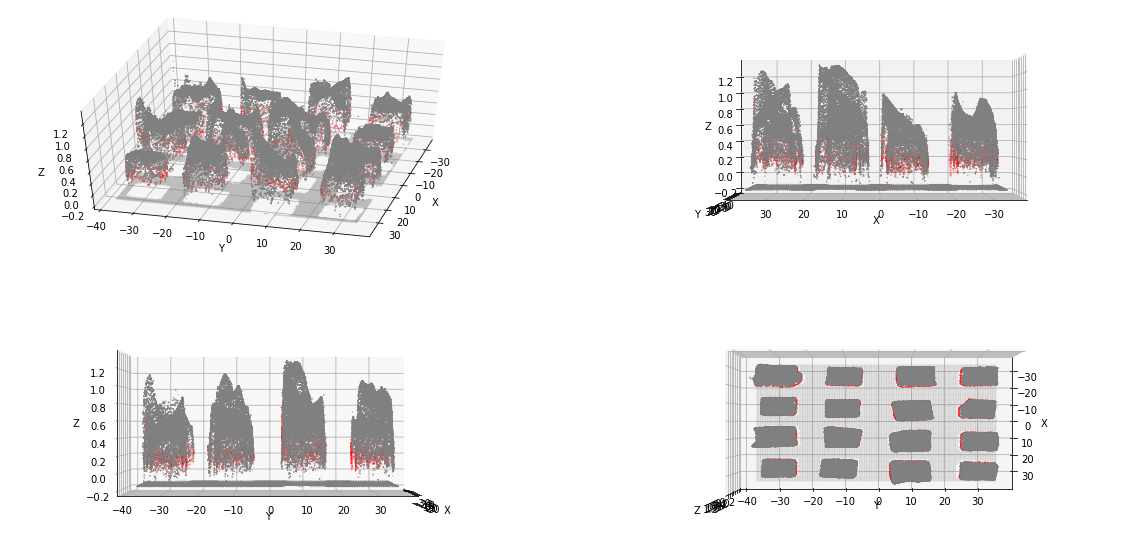

In [454]:
#slice_points = points[points[:,0]]

#i = np.all(np.logical_and(-28 <= points[:,0], points[:,0] <= -26), axis=1)
#print(i)
# pts = points
# pts = pts[pts[:,0] > -28]
# pts = pts[pts[:,0] < -26]

#pts = np.array(inner)
pts = col2points(bx, by, bz)
xr, yr, zr = xyz_cols(pts)
#xr, yr, zr = pts[:,0], pts[:,1], pts[:,2]
#xr, yr, zr = pts[:,0], pts[:,1], pts[:,2]

fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot(221, projection='3d')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.view_init(elev=45, azim=15)
# ax1.bar3d(xr, yr, zr, 0.5, 0.5, Z.ravel(), shade=True, color='lightgray')
ax1.scatter(xr, yr, zr, s=0.1, c='gray')
ax1.scatter(xcol(img4_edge_points), ycol(img4_edge_points), zcol(img4_edge_points), s=0.1, c='red')

ax1 = plt.subplot(222, projection='3d')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.view_init(elev=0, azim=90)
ax1.scatter(xr, yr, zr, s=0.1, c='gray')
ax1.scatter(xcol(img4_edge_points), ycol(img4_edge_points), zcol(img4_edge_points), s=0.1, c='red')

ax1 = plt.subplot(223, projection='3d')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.view_init(elev=0, azim=0)
ax1.scatter(xr, yr, zr, s=0.1, c='gray')
ax1.scatter(xcol(img4_edge_points), ycol(img4_edge_points), zcol(img4_edge_points), s=0.1, c='red')


#fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot(224, projection='3d')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.view_init(elev=90, azim=0)
ax1.scatter(xr, yr, zr, s=0.1, c='gray')
ax1.scatter(xcol(img4_edge_points), ycol(img4_edge_points), zcol(img4_edge_points), s=0.1, c='red')



In [67]:
B1

array([[-33.69053919, -33.33829368, -32.98604818, ..., -20.65745546,
        -20.30520996, -19.95296445],
       [-33.69053919, -33.33829368, -32.98604818, ..., -20.65745546,
        -20.30520996, -19.95296445],
       [-33.69053919, -33.33829368, -32.98604818, ..., -20.65745546,
        -20.30520996, -19.95296445],
       ...,
       [-33.69053919, -33.33829368, -32.98604818, ..., -20.65745546,
        -20.30520996, -19.95296445],
       [-33.69053919, -33.33829368, -32.98604818, ..., -20.65745546,
        -20.30520996, -19.95296445],
       [-33.69053919, -33.33829368, -32.98604818, ..., -20.65745546,
        -20.30520996, -19.95296445]])

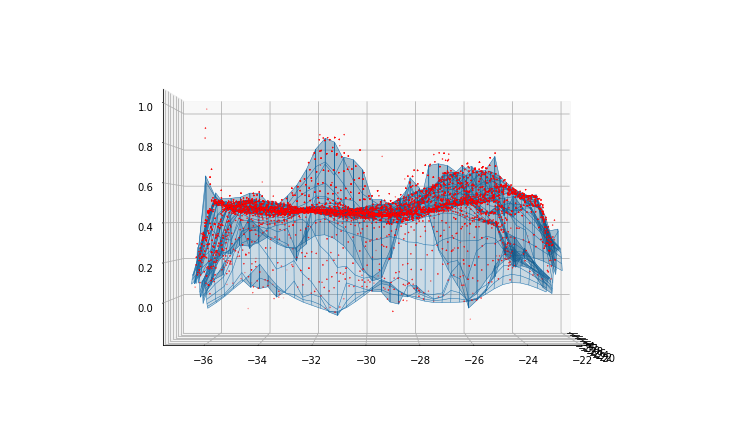

In [66]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig)
ax.view_init(elev=0, azim=0)
ax.plot_wireframe(B1, B2, Z, lw=0.5)
ax.plot_surface(B1, B2, Z,alpha=0.2)
ax.scatter3D(x,y,z, c='r', s=0.1)
plt.show()


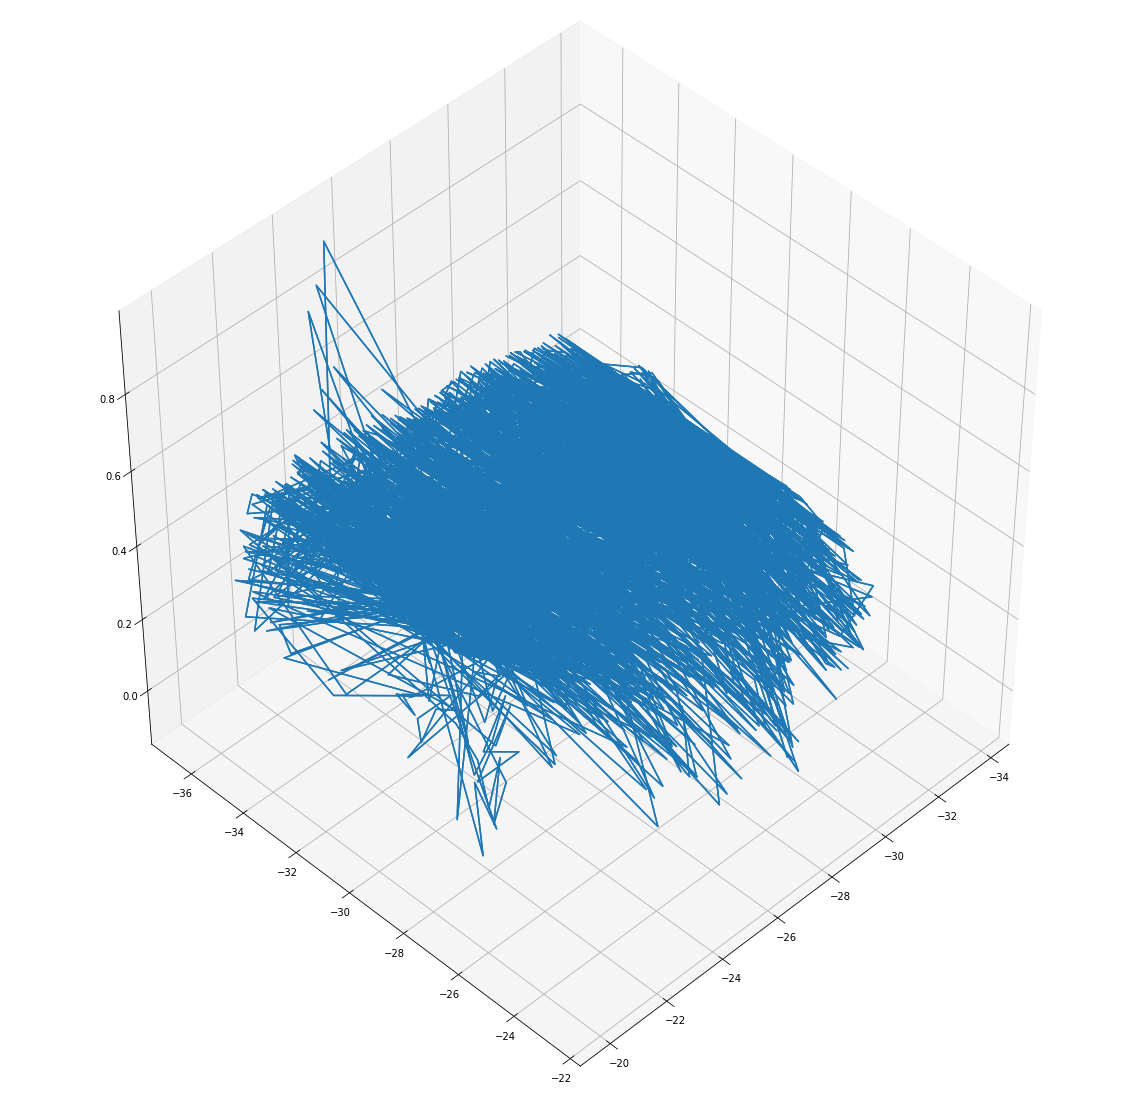

In [46]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np

import scipy as sp
import scipy.interpolate
spline = sp.interpolate.Rbf(x_arr, y_arr, z_arr,function='thin_plate',smooth=5, episilon=5)

Z = spline(x_arr,y_arr)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

x_arr, y_arr, z_arr = xyz_cols(xy_samples[0])
z = np.array([z_arr, z_arr])
ax.plot_wireframe(x_arr, y_arr, z)
ax.view_init(elev=45, azim=45)

plt.show()